In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'sample_submission.csv', 'train_relationships.csv', 'train']


In [29]:
import matplotlib.pyplot as plt
import PIL
import keras

In [3]:
train_df = pd.read_csv("../input/train_relationships.csv")

In [32]:
import glob
import os
#path = '../input/train/' + train_df.p1[100]
image_datas = list()
for path in train_df.p1:
    image_datas.extend([PIL.Image.open(f).resize((64, 64), PIL.Image.ANTIALIAS) for f in glob.glob('../input/train/' + path + "/*.jpg", recursive=True)])

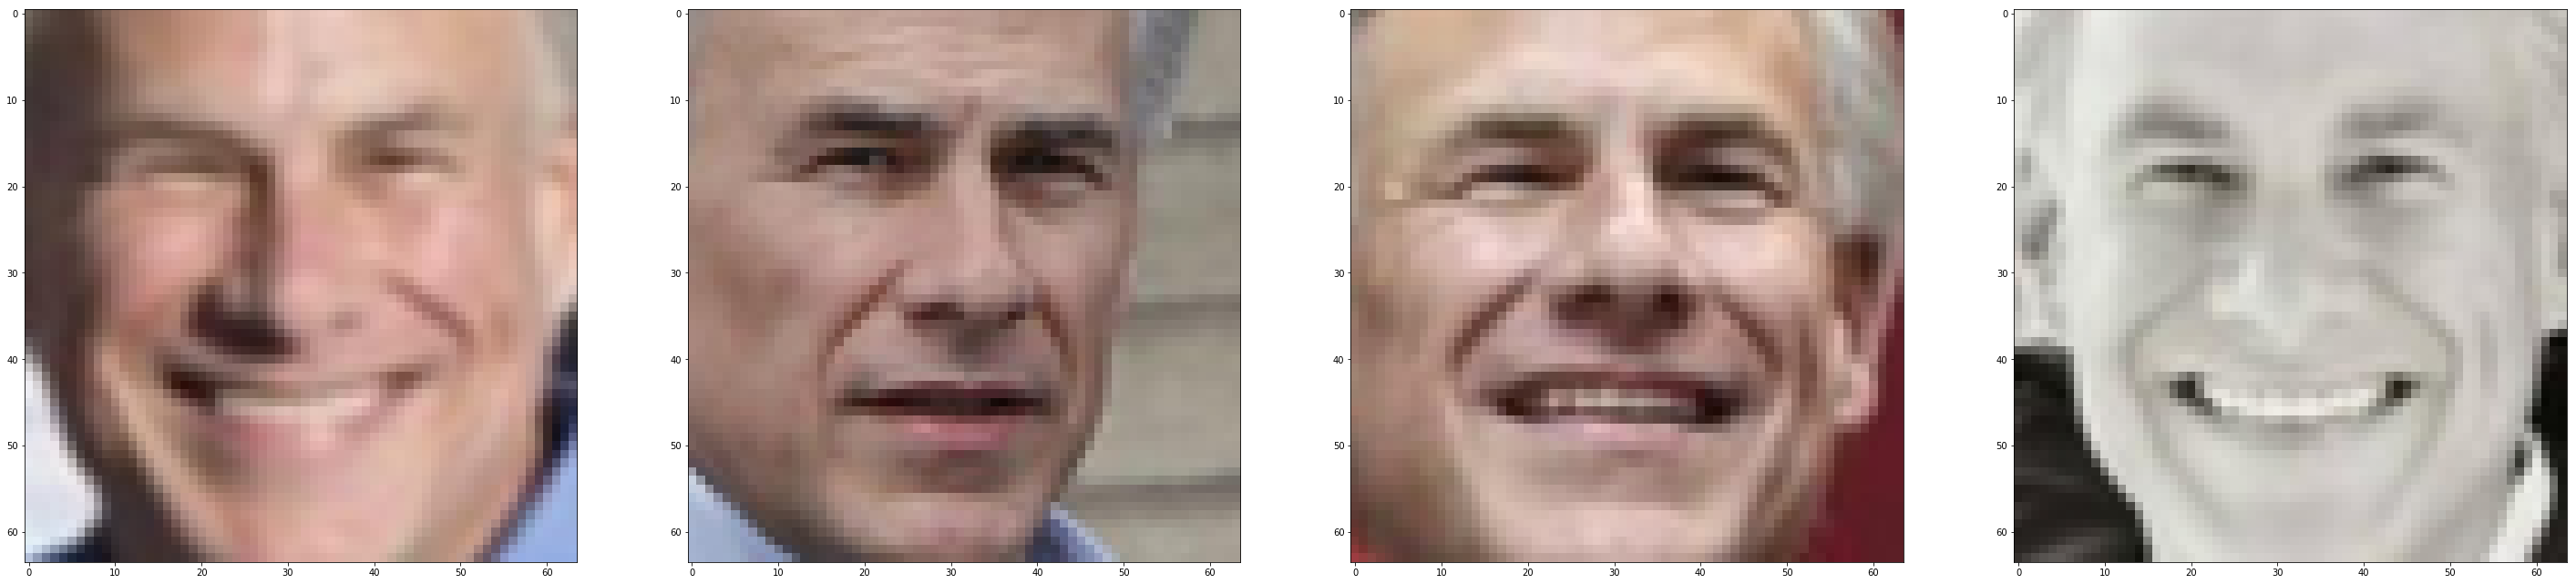

In [33]:
f, ax = plt.subplots(1,4 ,  figsize=(50,20))
for i in range(4):
    ax[i].imshow(image_datas[i])

In [34]:
image_datas = image_datas[:1000]
for i in range(len(image_datas)):
    image_datas[i] = np.asarray(image_datas[i]) / 255.

In [39]:
image_datas = np.asarray(image_datas)

In [35]:
from keras.layers import Conv2D, UpSampling2D, MaxPool2D, Dense, Input
from keras import Sequential, Model

encoder = Sequential([
    Conv2D(filters=64, kernel_size=8, strides=2, activation="relu", padding="same"), 
    MaxPool2D(pool_size=4, padding="same"),
    Conv2D(filters=32, kernel_size=4, strides=1, activation="relu", padding="same"),
    MaxPool2D(pool_size=2, padding='same'),
    Dense(256),
    Dense(128),
])
decoder = Sequential([
    Dense(128),
    Dense(256),
    Conv2D(filters=32, kernel_size=4, strides=1, activation="relu", padding="same"),
    UpSampling2D(size=2),
    Conv2D(filters=64, kernel_size=8, strides=2, activation="relu", padding="same"),
    UpSampling2D(16),
    Conv2D(3, kernel_size=16, activation="sigmoid", padding="same")
])
autoencoder = Sequential([encoder, decoder])

In [36]:
autoencoder.compile(loss="mse", optimizer="adam", metrics=["mean_squared_error"])

In [40]:
batch_size = 32
epochs = 5
learning_rate = 0.01

autoencoder.fit(image_datas.reshape(-1, 64, 64, 3), image_datas.reshape(-1, 64, 64, 3), batch_size, epochs, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 200s 250ms/step - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 2/5
800/800 [==============================] - 200s 250ms/step - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 3/5
800/800 [==============================] - 201s 251ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 4/5
800/800 [==============================] - 201s 251ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 5/5
800/800 [==============================] - 200s 250ms/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0188 - val_mean_squared_error: 0.0188


In [41]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_14 (Sequential)   (None, 4, 4, 128)         86496     
_________________________________________________________________
sequential_15 (Sequential)   (None, 64, 64, 3)         360931    
Total params: 447,427
Trainable params: 447,427
Non-trainable params: 0
_________________________________________________________________


In [42]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 4, 4, 128)         16512     
_________________________________________________________________
dense_24 (Dense)             (None, 4, 4, 256)         33024     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 32)          131104    
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 64)          131136    
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 64, 3)         49155     
Total para

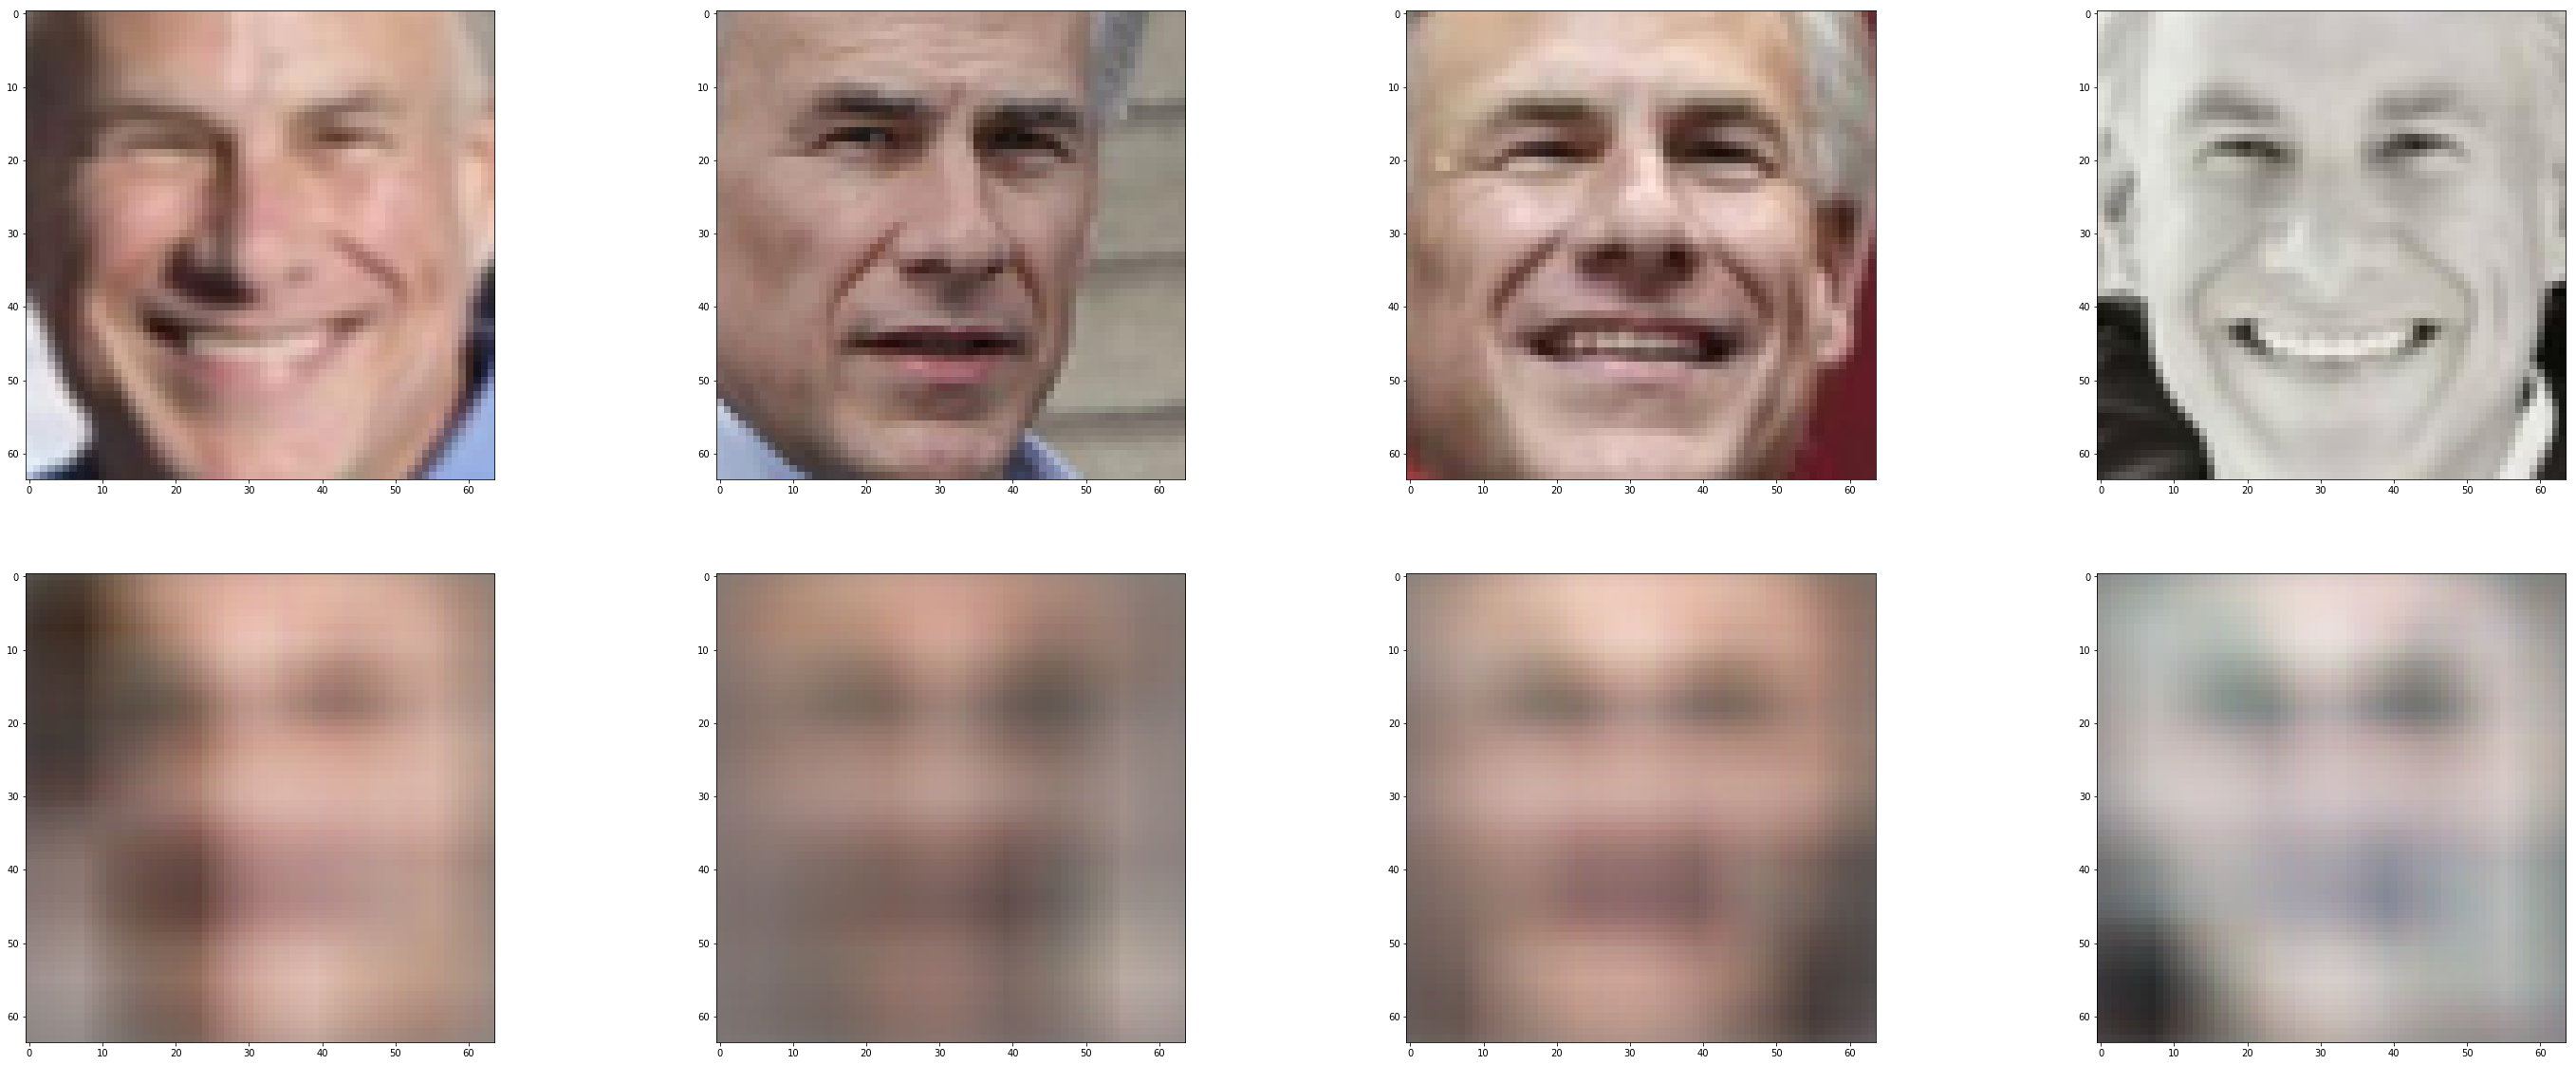

In [44]:
pred = autoencoder.predict(image_datas[:4], batch_size)
f, ax = plt.subplots(2, 4, figsize=(50,20))
for i in range(4):
    ax[0][i].imshow(image_datas[i])
    ax[1][i].imshow(pred[i])

In [46]:
from sklearn.cluster import KMeans

In [53]:
import random

papers = [0, 1, 3, 4]
for i in range(2):
    print(random.sample(papers, 3))

[1, 4, 3]
[4, 0, 1]
